In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

Python version: 3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
pandas version: 0.19.2
matplotlib version: 1.5.3
NumPy version: 1.11.3
SciPy version: 0.18.1
IPython version: 5.1.0
scikit-learn version: 0.18.1
mglearn version: 0.1.3


## 1.6 Linear Models for Classification

In the case of Linear Models for classification, the predicted value threshold is set at zero (i.e. a logical determination of whether the target values meet the conditions or not).

> Let’s look at binary classification
first. In this case, a prediction is made using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The above formula, when reflected on chart, will appear to be a **decision boundary** that seperates two categoreis using a line, a plane, or a hyperplane. 

### 1.6.1 Common Models for Linear Classification

All algorithms for linear classification models differ in the following two ways:

+ How models measure how well a particular combination of coefficients and intercept fits the training data
+ If any, what kind of regularization they use



Two most commen linear classification algorithms:

+ **Logistic Regression**: linear_model.LogisticRegression
+ **Linear Support Vector Machines**: svm.LinearSVC (Support Vector Classifier)

Let's see how these two algorithms apply on the *forge* dataset.

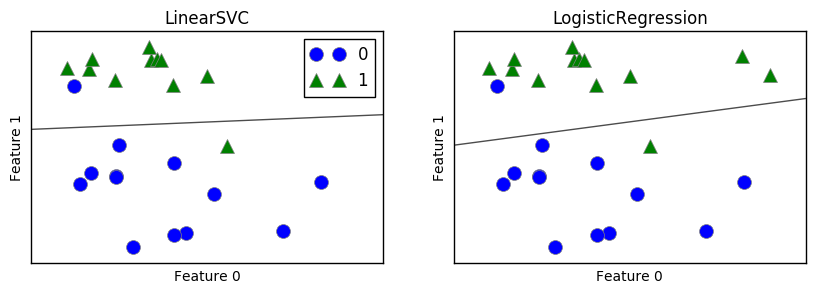

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In the above graphs, the line is the *decision boundary* that would determine the category of dots falling above or under the line. If the points fall above the line, they would be categorized as Category 1 and under as Category 0.

### 1.6.1.1 Tweaking the regularization parameters for LogisticRegression and LinearSVC

> By default, both models apply an **L2 regularization**, in the same
way that Ridge does for regression.

>For LogisticRegression and LinearSVC the **trade-off parameter** that determines the
strength of the regularization is called **C**, and **higher values of C correspond to less regularization**. In other words, when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with **low values of the parameter C**, the models put more emphasis on finding **a coefficient vector (w) that is close to zero**.

> Using **low values of C will cause the algorithms to try to adjust to the “majority” of data points**, while using a higher value of C stresses the importance that each individual data point be classified correctly.

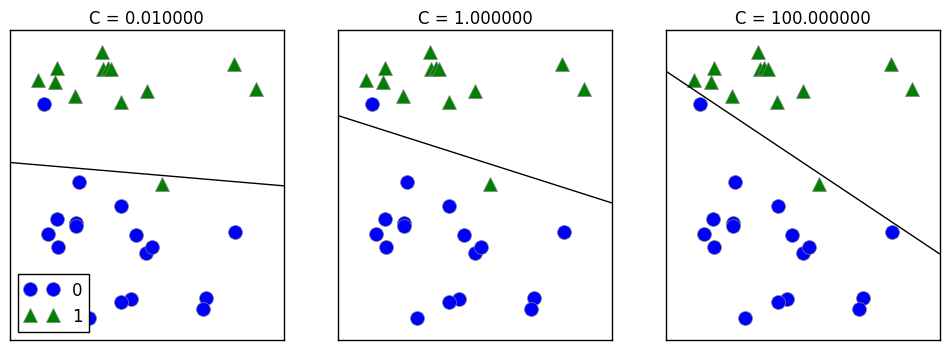

In [6]:
mglearn.plots.plot_linear_svc_regularization()

On the left, the strongly regularized model choose a relatively horizontal line by following only the general trend: that category 1 points are above and category 0 points are below.

On the right, since the regularization is been set to really low, the line tries its best to correctly categorize the points. Therefore, all points in category 0 is been identified.

**The right option might overfit since it is trying over hard to fit ALL OF THE POINTS in the test set**.

## 1.6.2 Logistic Regression

#### 1.6.2.1 LinearLogistic on Breast Cancer dataset

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


The default value for C in LogisticRegression is 1. However, *since the training and test sets have close scores, it is likely that the model is underfitting*. Let's try a more flexible model setting.

In [10]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


The more flexible (i.e. more complex) model have better performance in both training and test set. Just to compare the models, we can try a even more restricted model with C = 0.01.

In [11]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


As expected, more restricted model results in lower performance and closer accuracy for both training and testing set. It's time for us to examine again the performance-complexity graph.

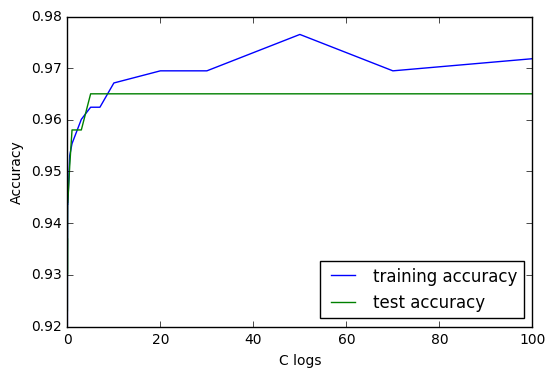

In [26]:
training_accuracy = []
test_accuracy = []

# try C from 0.00001 to 1000
C_settings = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 30, 50, 70, 100]

for C in C_settings:
    # build the model
    logreg = LogisticRegression(C=C)
    logreg.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(logreg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(logreg.score(X_test, y_test))

plt.plot(np.array(C_settings),
         training_accuracy, label="training accuracy")
plt.plot(np.array(C_settings),
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C logs")
plt.legend(loc=4)

As we can expect from the C settings, having more and more flexible model makes the training accuracy more and more accurate; however, the accuracy of the data on the test set hits a plateau at around C = 5.

Finally, let's check out the coefficient combinations of the models at different levels of C.

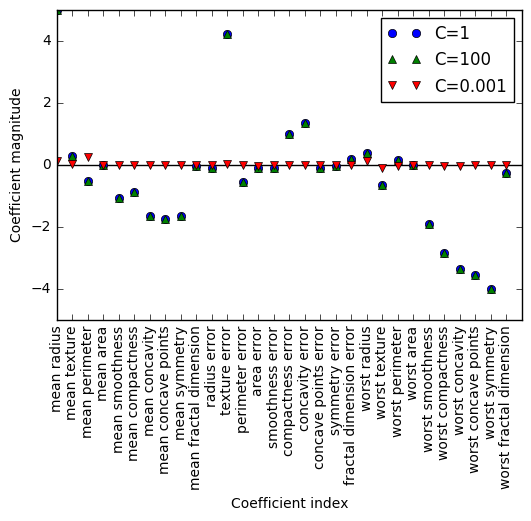

In [27]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()